# Исследование данных о продажах компьютерных игр

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

**Цели исследования:**

- ознакомиться с исходными данными;
- подготовить данные к анализу: проверить на наличие пропущенных значений и дубликатов, заполнить пропущенные значения;
- провести исследовательский анализ данных;
- составить портреты пользователей для каждого региона (Северная Америка, Европа, Япония);
- сделать прогноз на 2017 год;
- проверить предложенные гипотезы.

## Открытие файла с данными и изучение общей информации

In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

In [2]:
#откроем файл с данными об играх
data_games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

#выведем любые 10 строк датафрейма
data_games.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
15038,Ano Hi Mita Hana no Namae o Bokutachi wa Mada ...,PSP,2012.0,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN
13672,Clockwork Empires,PC,NaN,Strategy,0.00,0.04,0.00,0.00,58.0,3.8,RP
1207,Command & Conquer: Tiberian Sun,PC,1999.0,Strategy,1.55,0.00,0.00,0.00,NaN,NaN,NaN
12075,Crayon Shin-Chan: Densetsu o Yobu Omake no To ...,GBA,2006.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
7911,Chibi-Robo! Park Patrol,DS,2007.0,Adventure,0.00,0.00,0.19,0.00,78.0,7.5,E
11515,Puzzler Mind Gym 3D,3DS,2011.0,Puzzle,0.07,0.00,0.00,0.01,51.0,tbd,E
15223,Bejeweled 2 Deluxe,PC,2006.0,Puzzle,0.00,0.02,0.00,0.00,NaN,tbd,E
13839,Akko ni Omakase! Brain Shock,DS,2006.0,Misc,0.00,0.00,0.04,0.00,NaN,NaN,NaN
14238,Cabela's Outdoor Adventures,GC,2005.0,Sports,0.03,0.01,0.00,0.00,NaN,8.8,T
15642,Poyo Poyo Kansatsu Nikki,3DS,2012.0,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN


In [3]:
#запросим все атрибуты исходной таблицы
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#проверим количество пропущенных значений в датафрейме
data_games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [5]:
#посчитаем количество игр в исходной таблице
data_games_initial = len(data_games)

data_games_initial

16715

**Вывод:** Мы видим, что исходная таблица содержит данные о 16715 играх и 11 параметров с характеристиками. В набор данных входят 2 типа данных: строки и вещественные числа. Необходимо преобразовать: столбцы Year_of_Release и Critic_Score в int, столбец User_Score в float. В столбце User_Score необходимо разобрать и обработать значение 'tbd'. Также обращаем внимание на значительное количество пропущенных значений, которые необходимо обработать на следующем этапе. Названия всех столбцов необходимо привести к нижнему регистру для хорошего стиля. В переменную data_games_initial заключили размер исходной таблицы, чтобы в дальнейшем посчитать долю оставшихся данных после предобработки.

## Предобработка данных

### Заменим названия столбцов (приведем к нижнему регистру)

In [6]:
#приведем названия столбцов к нижнему регистру
data_games.columns = data_games.columns.str.lower()

#проверим
data_games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Успешно привели названия столбцов к нижнему регистру.

### Обработаем пропуски при необходимости

In [7]:
#проверим количество пропущенных значений в датафрейме
data_games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
#проверим строки с пропущенными значениями в столбце name
data_games[data_games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в столбце **name** можем удалить, так как таких значений очень мало. Именно в этих строках присутствуют нулевые значения в столбце **genre**, за одно избавимся и от них.

Посчитаем % пропусков в столбце **year_of_release**. Если их доля небольшая, то можем смело удалить строки с пропущенными значениями в данном столбце.

Пропущенные значения в столбцах **critic_score и user_score**, к сожалению, заполнить нечем. Удалить их тоже нельзя, так как пропусков много, данное действие приведет к некорректным результатам анализа. Пропуски оставим.

Пропуски в столбце **rating** заменим на значение "undefined".

Значение 'tbd' в столбце user_score подразумевает 'To Be Determined' - 'Будет определено'. Получается, некоторые игры еще не получили оценки, и они неизвестны, поэтому можем заменить данное значение на 'NaN'.

In [9]:
#удалим строки с пропусками в столбце name
data_games = data_games.dropna(subset = ['name'])

In [10]:
#сохраним в переменную количество пропусков в столбце year_of_release
data_years = data_games['year_of_release'].isna().sum()

#выведем количество пропусков
print(data_games['year_of_release'].isna().sum())

#посчитаем долю пропущенных значений в столбце year_of_release
print(data_years / data_games_initial * 100)

269
1.609332934489979


Доля пропущенных значений в столбце year_of_release - 1,6%, совсем немного. Можем удалить строки с пропусками, данное действие не повлияет на результаты анализа. 

In [11]:
#удалим строки с пропусками в столбце year_of_release
data_games = data_games.dropna(subset = ['year_of_release'])

In [12]:
#заменим значение tbd на NaN
data_games.loc[data_games['user_score'] == 'tbd', 'user_score'] = np.nan

In [13]:
#поставим заглушку на пропуски в столбце rating
data_games['rating'] = data_games['rating'].fillna('undefined')

In [14]:
#повторно проверим количество пропусков в данных
data_games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

In [15]:
#проверим наличие явных дубликатов
data_games.duplicated().sum()

0

In [16]:
#теперь проверим наличие неполных дубликатов
#приведем содержимое в столбцах к нижнему регистру
data_games['name'] = data_games['name'].str.lower()
data_games['platform'] = data_games['platform'].str.lower()

data_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined
2,mario kart wii,wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,undefined
16711,lma manager 2007,x360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,undefined
16712,haitaka no psychedelica,psv,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undefined
16713,spirits & spells,gba,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,undefined


In [17]:
#проверяем количество дубликатов
data_games.duplicated(subset = ['name', 'platform', 'year_of_release']).sum()

1

In [18]:
#удаляем дубликат
data_games.drop_duplicates(subset = ['name', 'platform', 'year_of_release'], keep = 'first', inplace = True)

#проверяем, что все удалилось
data_games.duplicated(subset = ['name', 'platform', 'year_of_release']).sum()

0

In [19]:
#рассмотрим уникальные значение в столбце genre
data_games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [20]:
#рассмотрим уникальные значение в столбце platform
data_games['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

In [21]:
#рассмотрим уникальные значения в столбце rating
data_games['rating'].unique()

array(['E', 'undefined', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Удалили строки с пропусками в столбце name. Проверили долю пропусков в столбце year_of_release, в результате удалили строки. Значение 'tbd' в столбце user_score заменили на NaN. В столбце rating заменили пропуски на 'undefined'.

Проверили таблицу на наличие явных дубликатов - отсутствуют. В столбцах genre, platform, rating повторений не обнаружено. Также проверили таблицу на наличие неявных дубликатов по столбцам name, platform и year_of_release. Был устранен 1 дубликат.

### Преобразуем данные в нужные типы

In [22]:
#преобразуем данные в нужные типы
data_games['year_of_release'] = data_games['year_of_release'].astype('int', errors = 'ignore')
data_games['critic_score'] = data_games['critic_score'].astype('Int64', errors = 'ignore')
data_games['user_score'] =  data_games['user_score'].astype('float', errors = 'ignore')

#проверим 
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   Int64  
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
dtypes: Int64(1), float64(5), int32(1), object(4)
memory usage: 1.5+ MB


Столбцы year_of_release, critic_score и user_score приняли новый тип данных.

### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [23]:
#добавим новый столбец с суммарными продажами
data_games['total_sales'] = data_games['na_sales']+data_games['eu_sales']+data_games['jp_sales']+data_games['other_sales']

#проверим
data_games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,super mario bros.,nes,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,undefined,40.24
2,mario kart wii,wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,wii sports resort,wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,undefined,31.38
5,tetris,gb,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,undefined,30.26
6,new super mario bros.,ds,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,wii play,wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,new super mario bros. wii,wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,duck hunt,nes,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,undefined,28.31


In [24]:
#посчитаем долю оставшихся данных после предобработки
print(len(data_games) / data_games_initial * 100)

#посмотрим, сколько игр было удалено
print(data_games_initial - len(data_games))

98.37271911456776
272


In [25]:
# Посмотрим, что у нас осталось
temp = data_games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,' : кол-во 0', temp[temp[col_l] == 0][col_l].count(),
        ', процент 0', round(temp[temp[col_l] == 0][col_l].count()/len(temp)*100, 2),'%')
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   Int64  
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: Int64(1), float64(6), int32(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' beyblade burst' ' fire emblem fates' " frozen: olaf's quest" ...
 'zwei!!' 'zyuden sentai kyoryuger: game de gaburincho!!'
 '¡shin chan flipa

**Вывод:** На этапе предобработки данных:
- привели названия столбцов к нижнему регистру;
- удалены строки с пропущенными значениями в столбцах name и year_of_release;
- значение 'tbd' в столбце user_score заменили на NaN;
- преобразованы типы данных в столбцах year_of_release, critic_score, user_score;
- не обнаружены явные дубликаты;
- устранен неявный дубликат;
- рассчитан и добавлен столбец с суммарными продажами во всех регионах.

В результате предобработки данных было удалено 272 строки. Текущая таблица содержит 98,3% данных из исходной таблицы.

Что касается пропусков, они могли возникнуть по многим причинам, например: опрос по оценке игр не проводился, игра не набрала достаточное количество оценок, также могла возникнуть техническая ошибка при сборе данных.

Пропуски в столбце year_of_release могли возникнуть из-за нехватки информации, получаемой от создателей игр. Можно предположить, что пропуски в столбцах critic_score, user_score и rating появились в связи с тем, что оценка игр происходит не так быстро, пользователям и критикам также необходимо время, чтобы пройти игру и оценить ее по разным параметрам. Организации ESRB также нужно полностью изучить игру, чтобы присвоить ей корректную возрастную категорию.

## Исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы

In [26]:
#рассчитаем период, за который предоставлены данные
year_min = data_games['year_of_release'].min()
year_max = data_games['year_of_release'].max()

print(f'В датафрейме data_games предоставлены данные за период с {year_min} по {year_max}.')

В датафрейме data_games предоставлены данные за период с 1980 по 2016.


In [27]:
#посчитаем количество годов
data_games['year_of_release'].nunique()

37

In [28]:
#рассмотрим количество выпущенных игр по годам
data_games['year_of_release'].value_counts()

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     652
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: count, dtype: int64

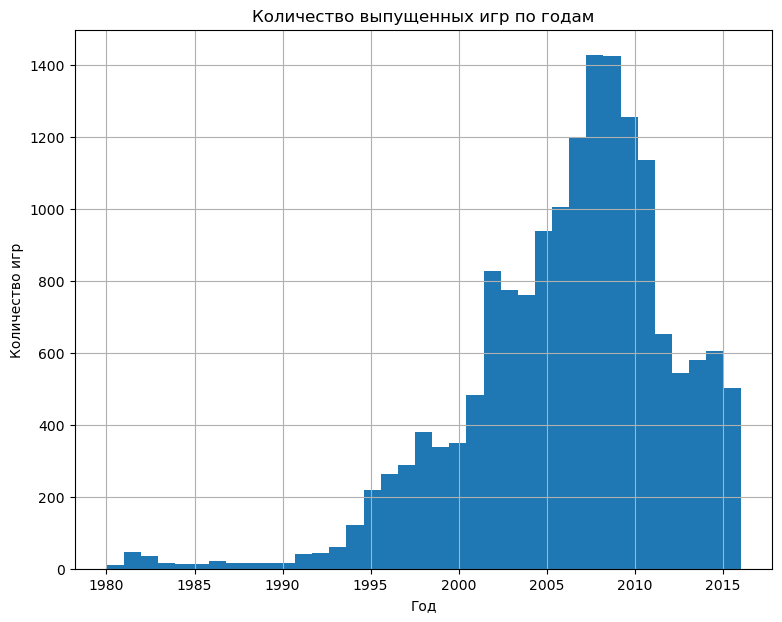

In [29]:
#построим гистограмму для стобца year_of_release
data_games['year_of_release'].hist(figsize = (9,7), bins = 37, range=(1980, 2016))

plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

Глядя на гистограмму, можно сделать вывод, что значительный рост количества выпущенных игр начался с 1994 года, поэтому данные до этого года не так важны. Построим гистограмму, отбросив данные до 1994 года.

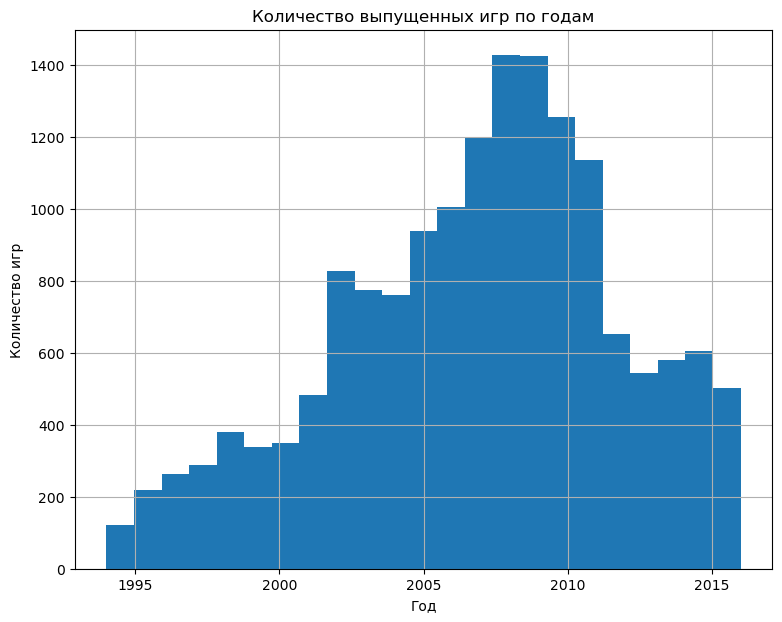

In [30]:
#построим гистограмму, отбросив данные до 1994 года
(
data_games.query('year_of_release >= 1994')
    .hist(column = 'year_of_release', figsize=(9, 7), grid = True, bins = 23)
)

plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

В период с 1994 по 2016 год пик по количеству выпущенных игр наблюдается в 2008 году (1427 игр), а меньше всего игр - в 1994 году (121 игра).

### Посмотрим, как менялись продажи по платформам

In [31]:
#создадим таблицу с топ 10 платформами по общей сумме продаж
platforms = data_games.pivot_table(index = ['platform'], values = 'total_sales', aggfunc = 'sum').sort_values(by ='total_sales', ascending = False)

top_10_platforms = platforms[:10].reset_index()

top_10_platforms

,platform,total_sales
0,ps2,1233.56
1,x360,961.24
2,ps3,931.33
3,wii,891.18
4,ds,802.78
5,ps,727.58
6,ps4,314.14
7,gba,312.88
8,psp,289.53
9,3ds,257.81


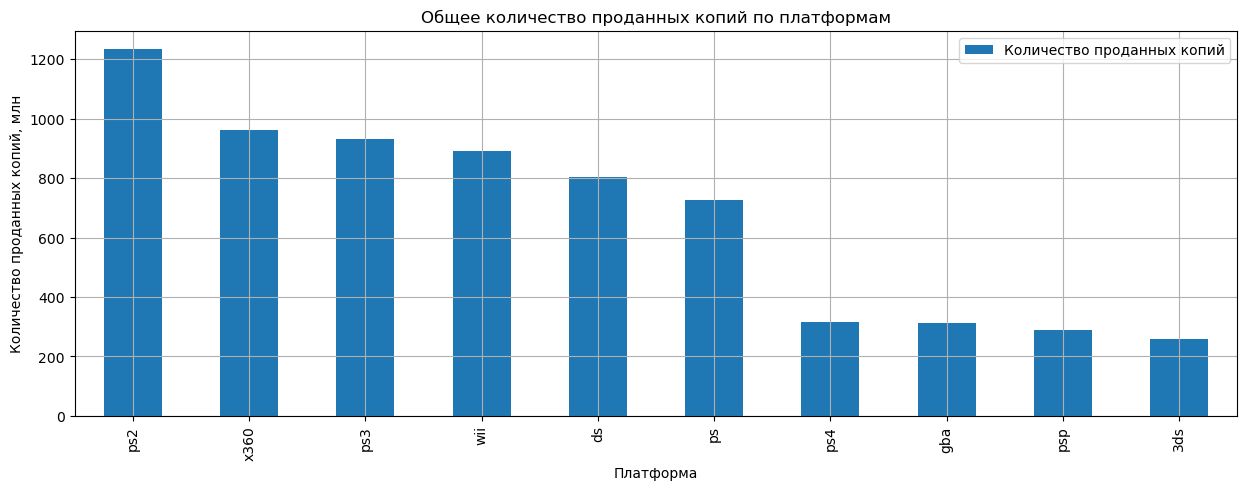

In [32]:
#построим график с топ 10 платформами по общей сумме продаж
top_10_platforms.plot(x="platform", y="total_sales", kind='bar', figsize=(15,5), grid = True, label='Количество проданных копий')

plt.title('Общее количество проданных копий по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий, млн')
plt.show()

Можем сделать вывод, что за все время наибольшее количество копий игр было продано для платформы PS2 (примерно 1233 млн. копий). Наименьшее количество проданных копий в топ 10 отмечается среди игр для платформы 3DS (примерно 258 млн. копий).

In [33]:
#зафиксируем названия платформ, входящих в топ 10
top_10_platforms_names = top_10_platforms['platform'].unique()

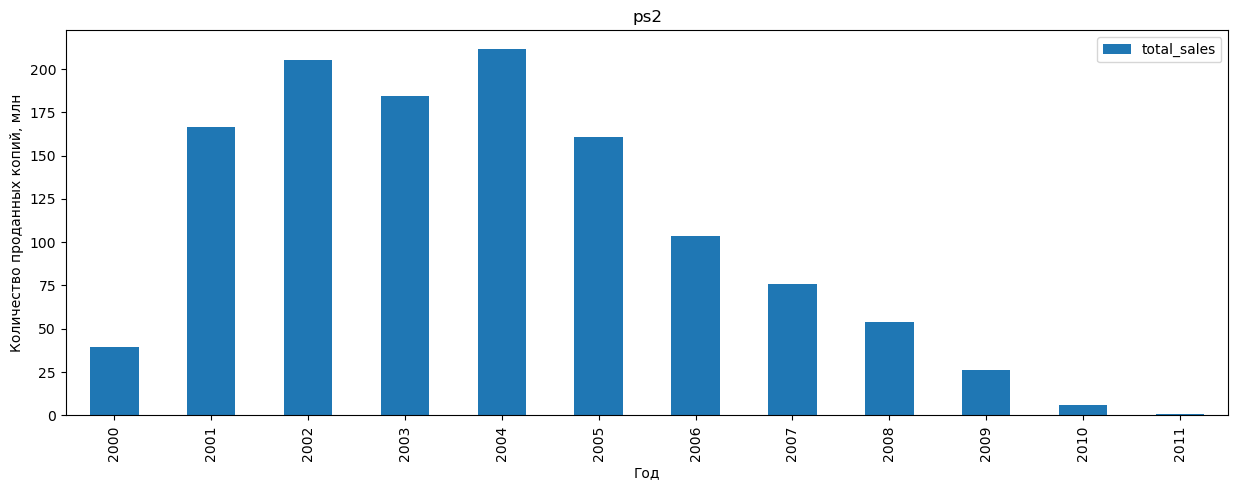

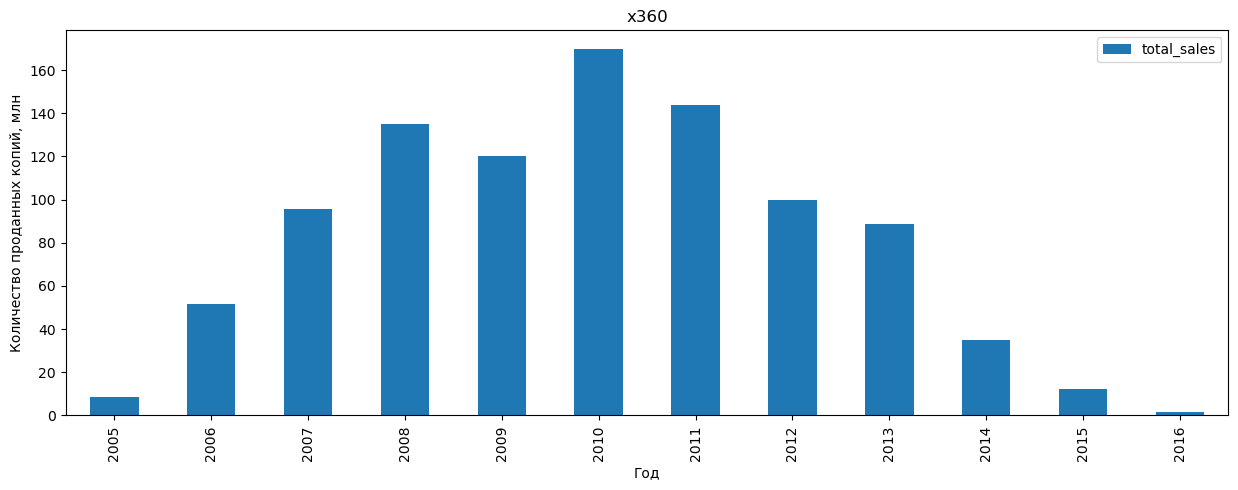

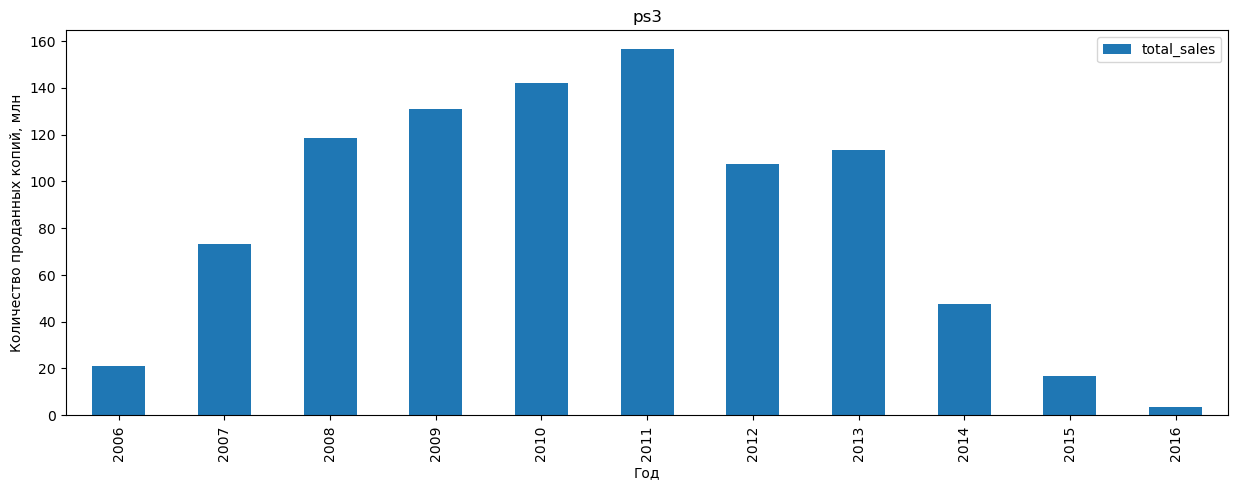

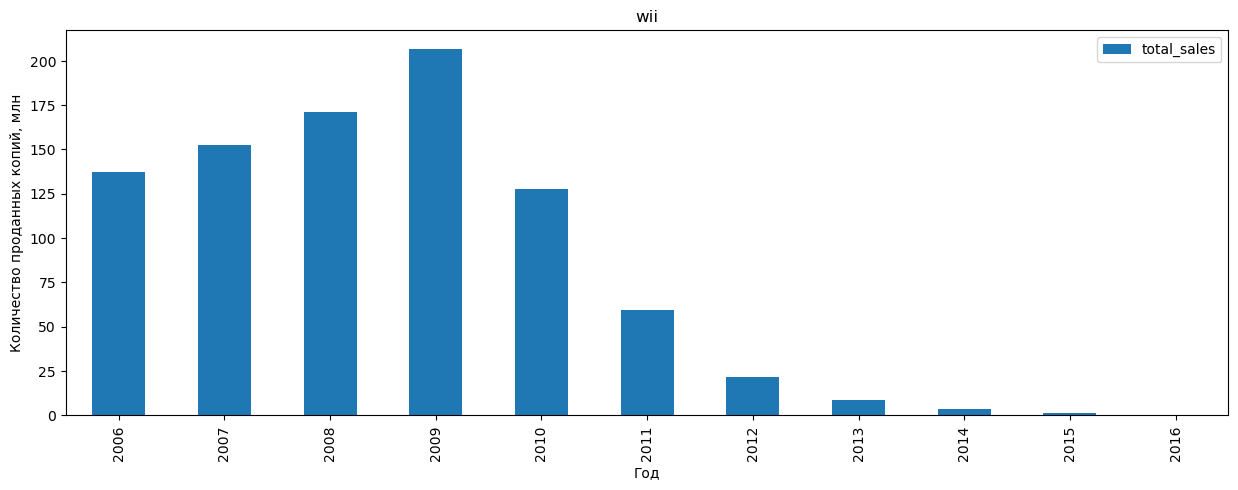

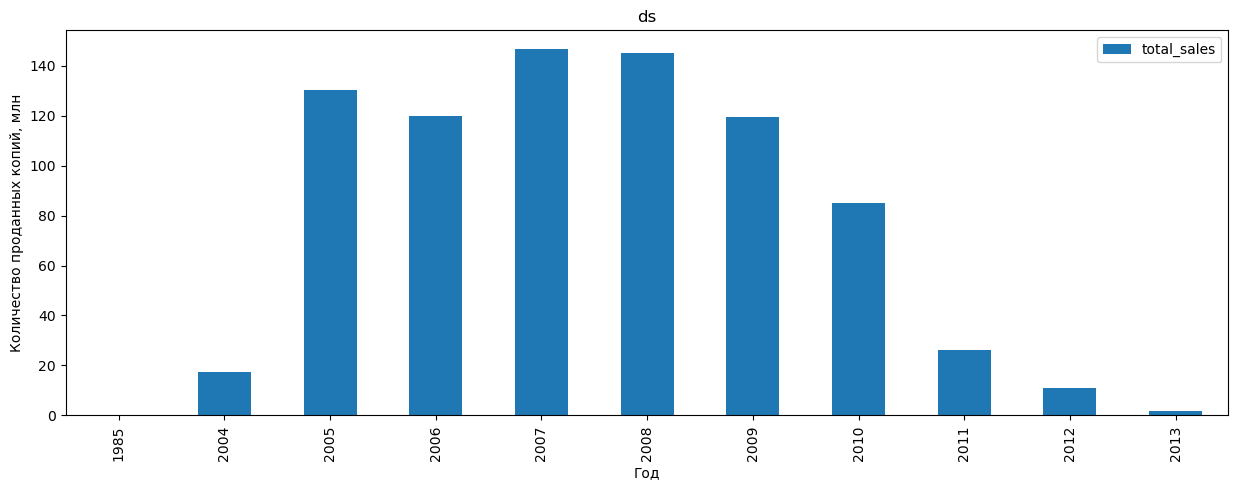

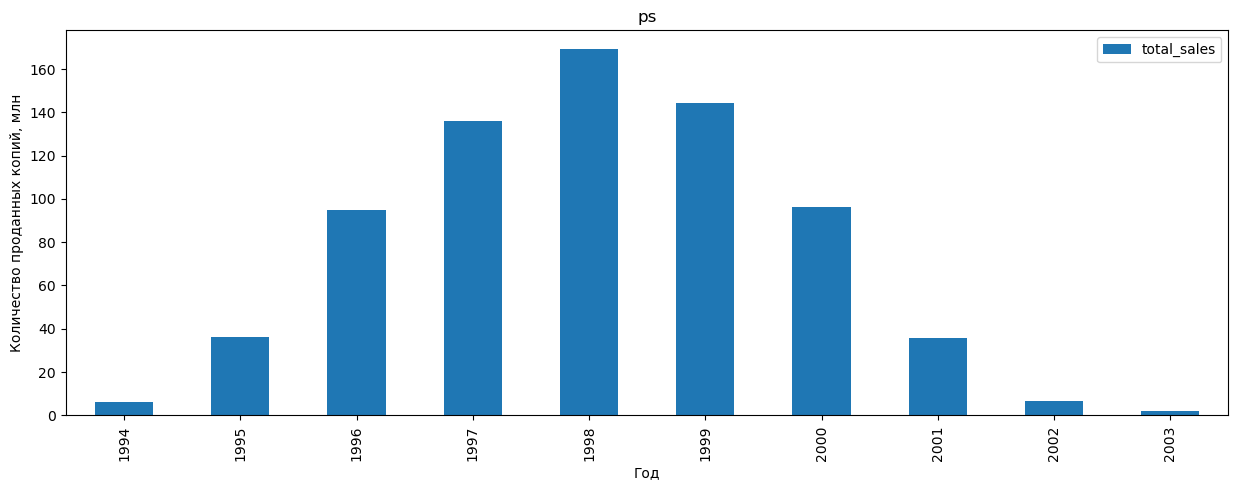

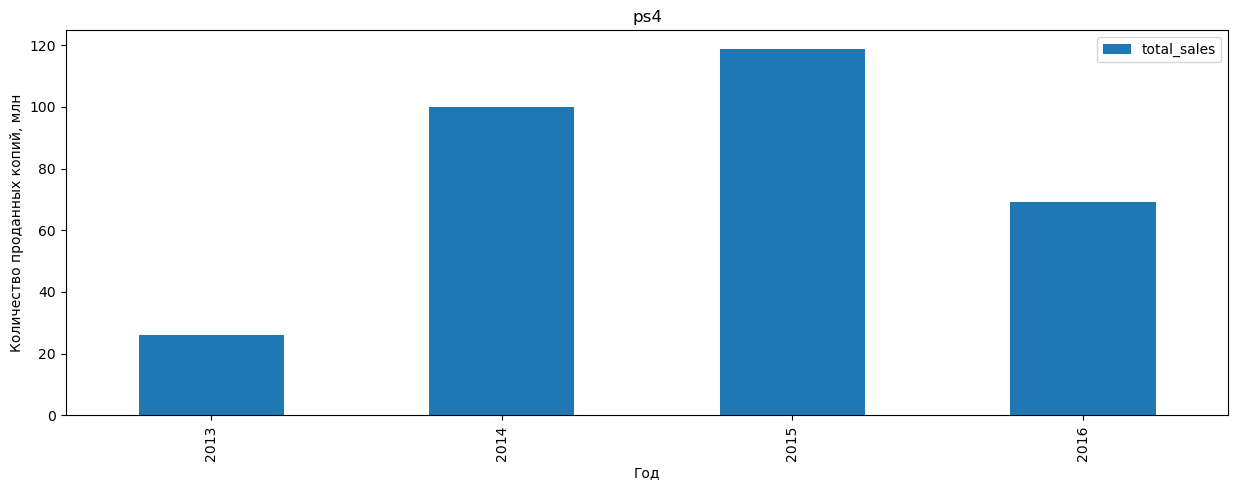

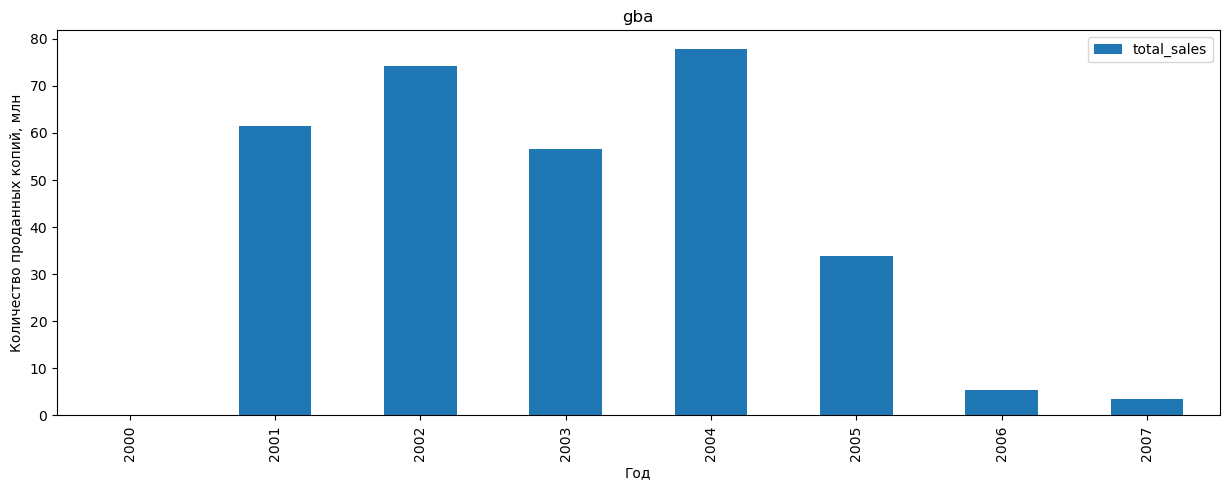

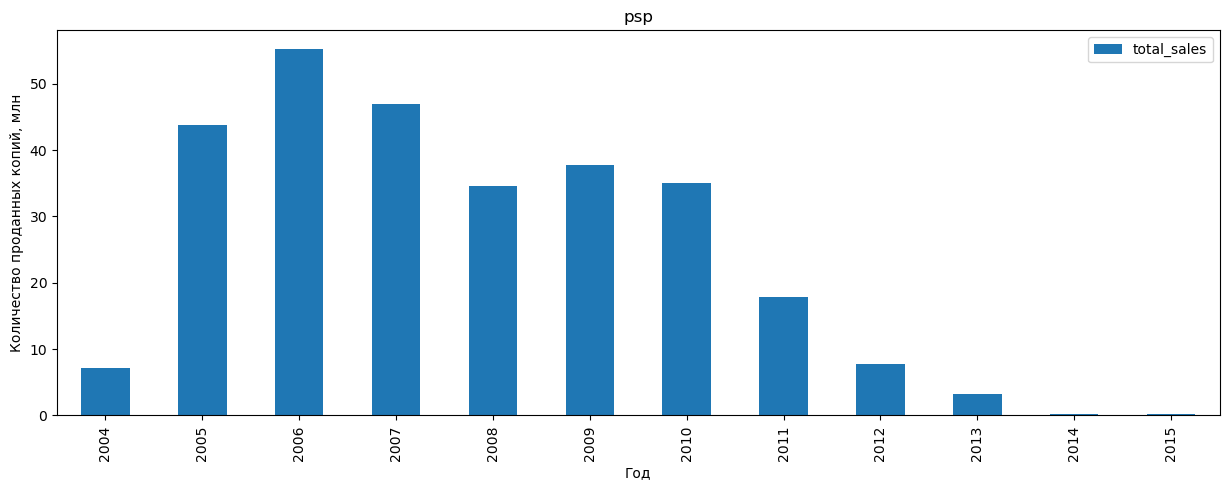

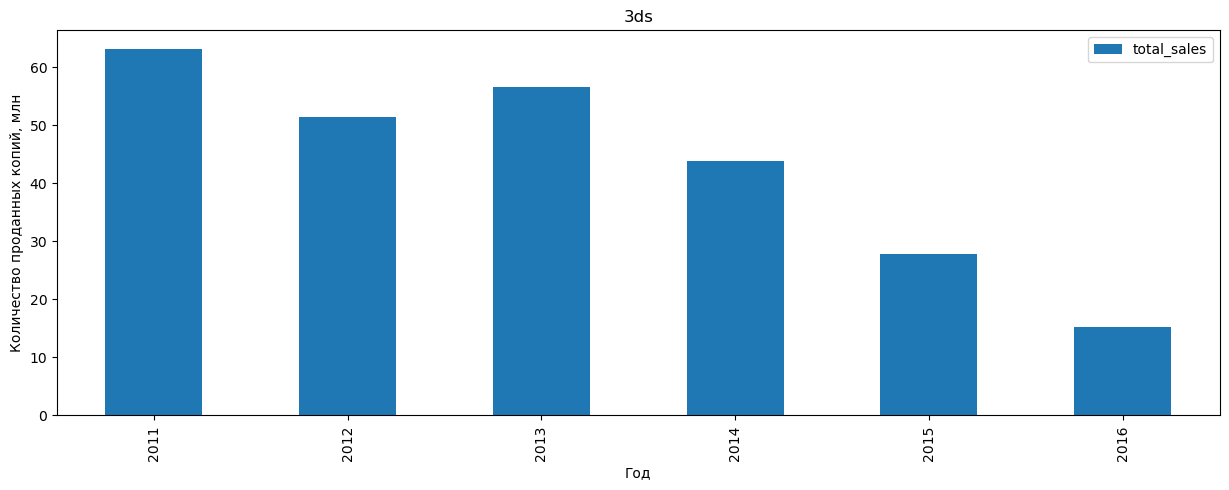

In [34]:
#создадим цикл, строящий график для каждой платформы из топ 10
for platform in top_10_platforms_names:
    data_games[(data_games['platform'] == platform) & (data_games['year_of_release'] != 0)].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar', figsize=(15,5))
    plt.title(platform)
    plt.xlabel('Год')
    plt.ylabel('Количество проданных копий, млн')
    plt.show()

In [35]:
# посчитаем средний срок жизни платформ
temp = data_games[data_games.year_of_release !=0].copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

Согласно построенным гистограммам и расчетам, можем сделать вывод, что в среднем игры для определенной платформы выпускаются в течение 7 лет. Пик продаж наступает примерно на 5-6 год выпуска игр для определенной платформы. Cамые продаваемые игры - игры, предназначенные для платформ Sony Play Station и Xbox.

### Возьмем данные за соответствующий актуальный период

In [36]:
#выделим срез данных с 2012 года
actual_period = data_games.query('year_of_release >= 2012')

Примем за актуальный период данные с 2012 года.

### Какие платформы лидируют по продажам, растут или падают?

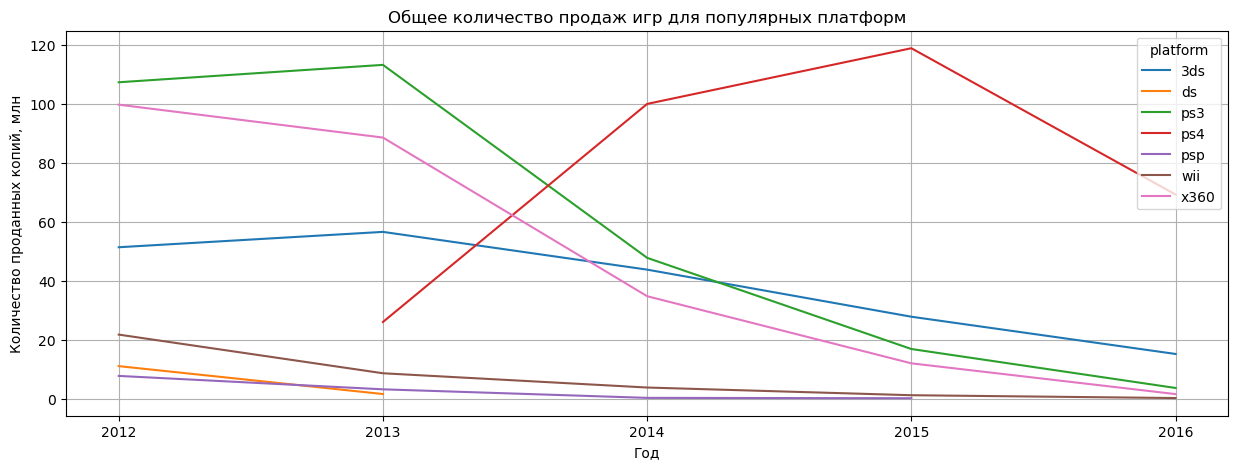

In [37]:
#построим график с данными за актуальный период
actual_period.query('platform in @top_10_platforms_names').pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(figsize=(15, 5), grid=True)

plt.xticks(ticks=range(2012, 2017))

plt.title('Общее количество продаж игр для популярных платформ')
plt.xlabel('Год')
plt.ylabel('Количество проданных копий, млн')
plt.show()

Видим, что к 2016 году общее количество продаж игр для популярных платформ значительно снизилось (составляют меньше 20 млн. проданных копий). Общее количество проданных копий игр для платформы PS4 тоже имеет тенденцию к снижению, но в 2016 году составляет примерно 70 млн. проданных копий, что в несколько раз больше относительно других популярных платформ.

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

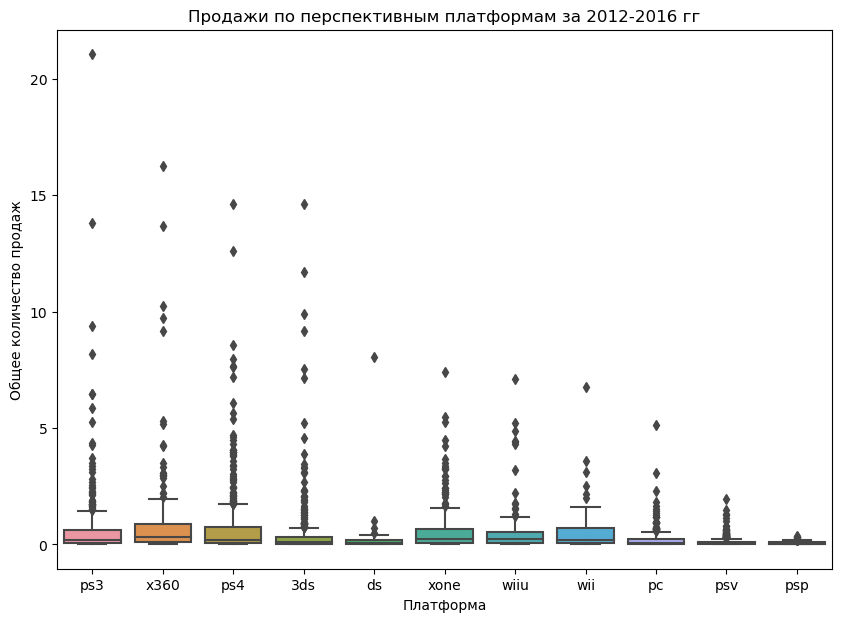

In [38]:
#построим ящик с усами
plt.figure(figsize=(10,7))
sns.boxplot(data = actual_period, x='platform', y='total_sales')
plt.title('Продажи по перспективным платформам за 2012-2016 гг')
plt.ylabel('Общее количество продаж')
plt.xlabel('Платформа')
plt.show()

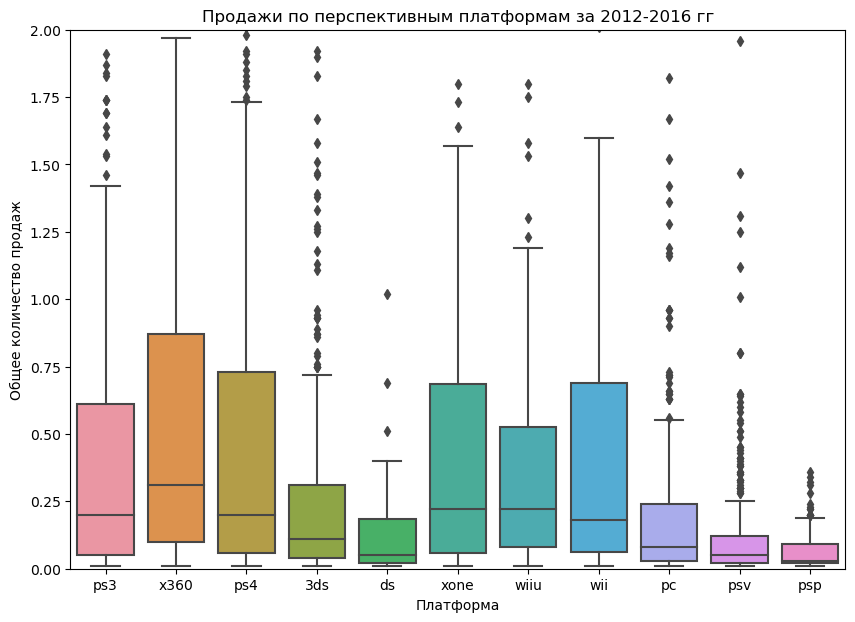

In [39]:
#построим масштабированный ящик с усами
plt.figure(figsize=(10,7))
sns.boxplot(data = actual_period, x='platform', y='total_sales')
plt.ylim([0,2])
plt.title('Продажи по перспективным платформам за 2012-2016 гг')
plt.ylabel('Общее количество продаж')
plt.xlabel('Платформа')
plt.show()

Согласно диаграмме размаха, медианное значение по общему количеству продаж различается для каждой платформы. За актуальный период (2012-2016 гг.) наиболее размашистое расположение боксплота и значение медианы наблюдается у платформ X360, PS4 и XOne, а наименьшее - у платформы PSP. В 2017 году интернет-магазину "Стримчик" следует ориентироваться на платформы X360, PS4 и XOne при выборе потенциально прибыльных игр.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

In [40]:
#выделим срез данных по платформе PS4
PS4_data = actual_period.query('platform == "ps4"')

In [41]:
#построим матрицу корреляции для платформы PS4
PS4_data_corr = PS4_data[['critic_score','user_score', 'total_sales']]
PS4_data_corr = PS4_data_corr.corr()

PS4_data_corr.style.background_gradient(axis=None) 

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


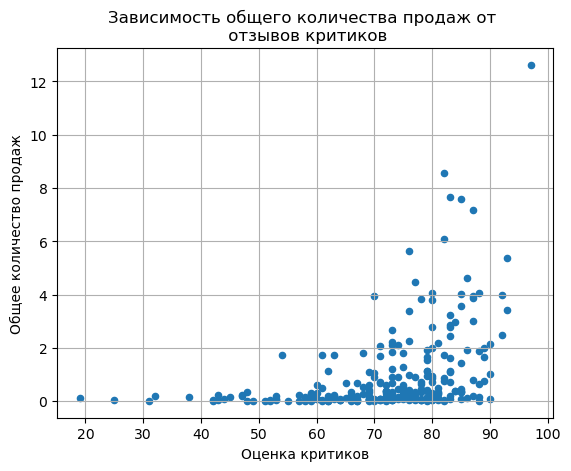

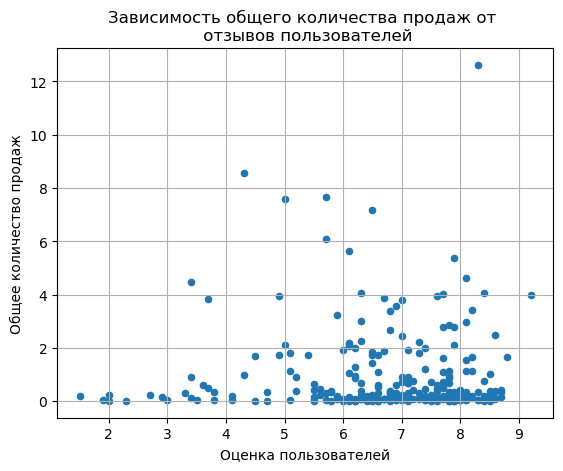

In [42]:
#построим диаграммы рассеяния для платформы PS4
PS4_data.plot(x='critic_score', y='total_sales', kind='scatter', grid=True)
plt.title('Зависимость общего количества продаж от \n отзывов критиков')
plt.ylabel('Общее количество продаж')
plt.xlabel('Оценка критиков')
plt.show()

PS4_data.plot(x='user_score', y='total_sales', kind='scatter', grid=True)
plt.title('Зависимость общего количества продаж от \n отзывов пользователей')
plt.ylabel('Общее количество продаж')
plt.xlabel('Оценка пользователей')
plt.show()

Посчитали корреляцию между отзывами и продажами для игр для самой популярной платформы в 2016 году - PS4. Можно сказать, что на продажи отзывы критиков влияют больше, чем отзывы пользователей. Зависимость между отзывами пользователей и продажами в данном случае не наблюдается.

### Соотнесем выводы с продажами игр на других платформах

Корреляция для платформы x360
              critic_score  user_score  total_sales
critic_score      1.000000    0.557352     0.360573
user_score        0.557352    1.000000     0.006164
total_sales       0.360573    0.006164     1.000000


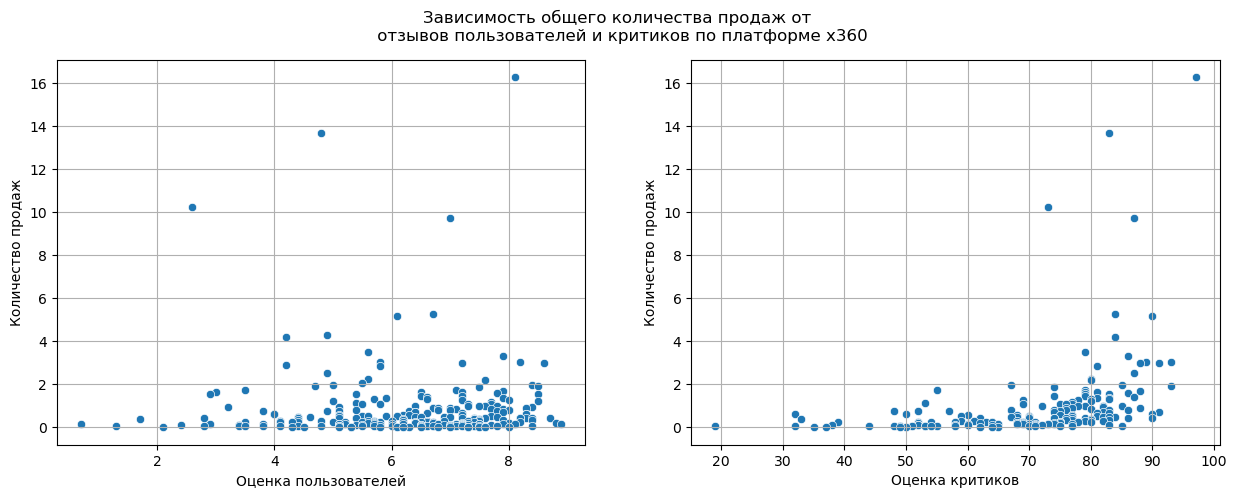

Корреляция для платформы ps3
              critic_score  user_score  total_sales
critic_score      1.000000    0.544510     0.334152
user_score        0.544510    1.000000    -0.006206
total_sales       0.334152   -0.006206     1.000000


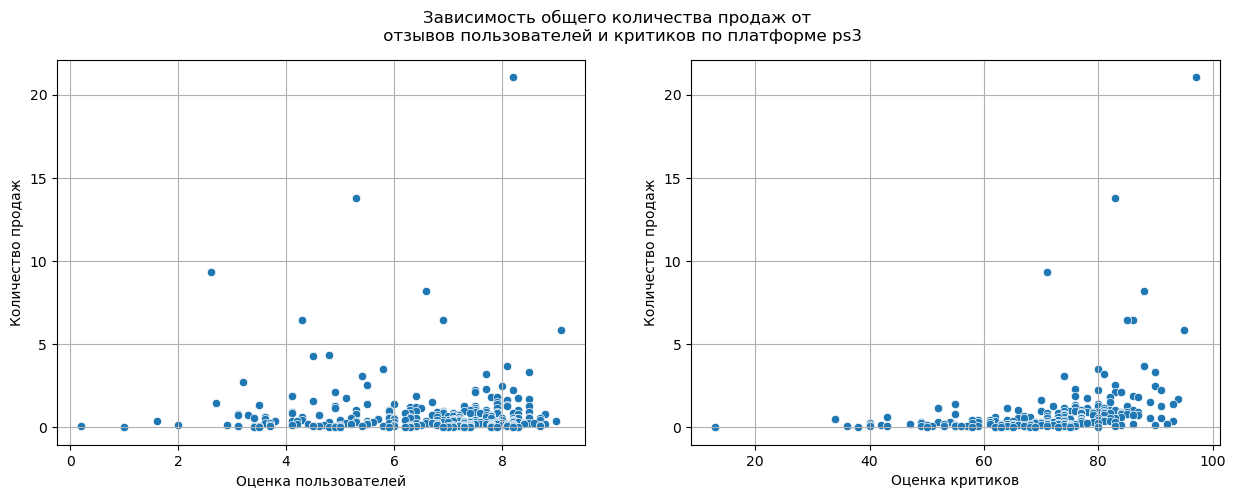

Корреляция для платформы wii
              critic_score  user_score  total_sales
critic_score      1.000000    0.816295    -0.424341
user_score        0.816295    1.000000     0.296197
total_sales      -0.424341    0.296197     1.000000


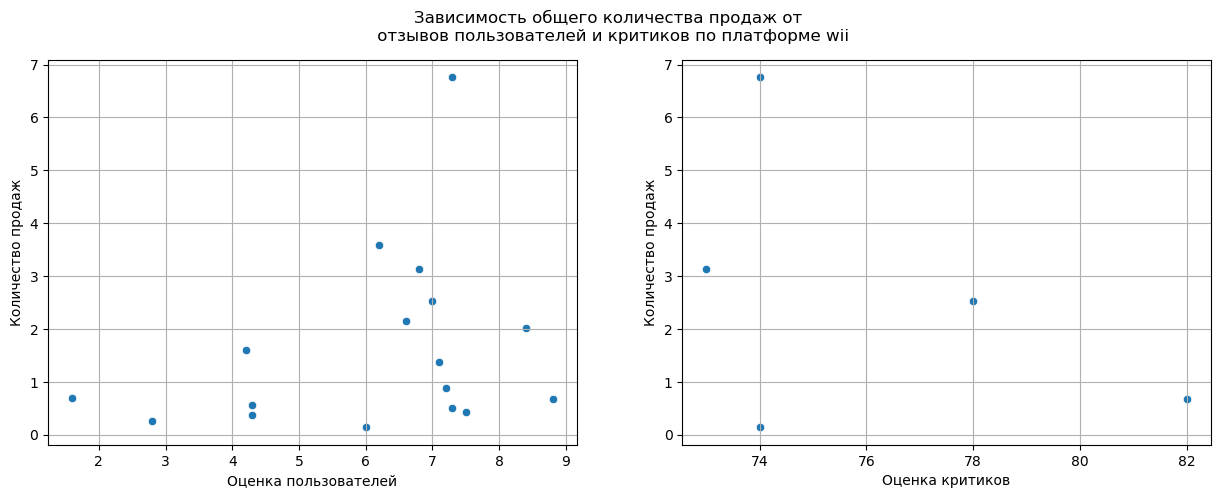

Корреляция для платформы psp
              critic_score  user_score  total_sales
critic_score           NaN         NaN          NaN
user_score             NaN    1.000000    -0.802302
total_sales            NaN   -0.802302     1.000000


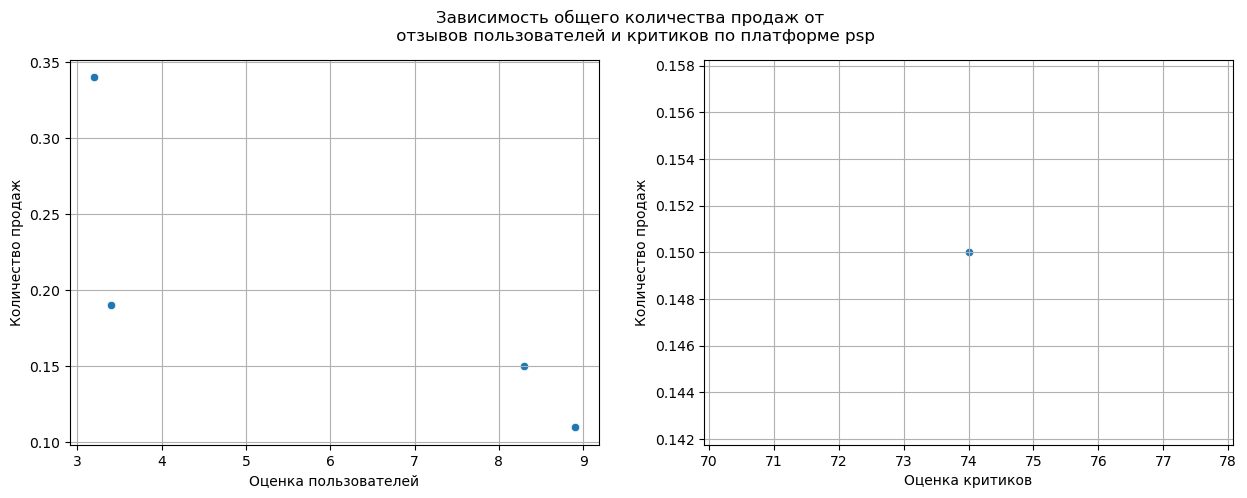

Корреляция для платформы 3ds
              critic_score  user_score  total_sales
critic_score      1.000000    0.722762     0.320803
user_score        0.722762    1.000000     0.197583
total_sales       0.320803    0.197583     1.000000


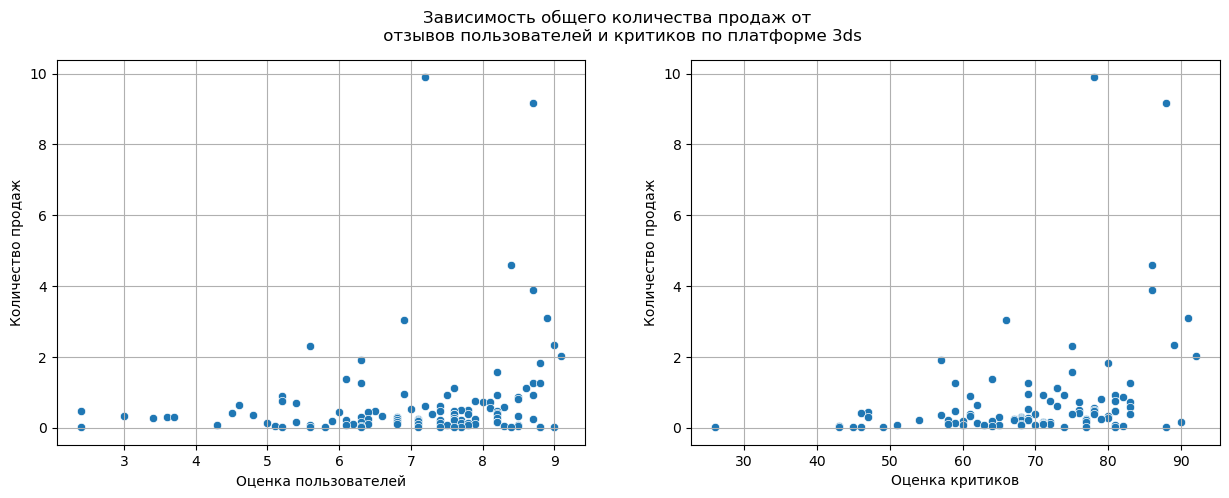

In [43]:
#создадим цикл, рассчитывающий матрицу корреляции и строящий диаграммы рассеяния для каждой платформы
top_platforms_list = ['x360','ps3','wii','psp','3ds']
for i in top_platforms_list:
    games = actual_period.query('platform == @i').copy()
    corr = games[['critic_score', 'user_score', 'total_sales']].corr()
    print('Корреляция для платформы {}'.format(i))
    print(corr)

    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='total_sales', data=games, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=games, ax=ax[1])
    fig.suptitle('Зависимость общего количества продаж от \n отзывов пользователей и критиков по платформе {}'.format(i), fontsize=12)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    ax[0].grid(True)
    ax[1].grid(True)
    plt.show()

Для платформы PSP не удалось выявить зависимость, так как представлено недостаточное количество данных за актуальный период.
На основе полученных данных можем сделать вывод, что для платформ 3DS, PS3 и X360 отзывы критиков так же имеют большее влияние на продажи, чем отзывы пользователей. А что касается платформы Wii, наблюдается слабая прямая зависимость продаж от отзывов пользователей. 

### Посмотрим на общее распределение игр по жанрам

In [44]:
#построим таблицу по наиболее продаваемым жанрам
actual_period.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'total_sales')

,total_sales
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.06
Misc,85.04
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


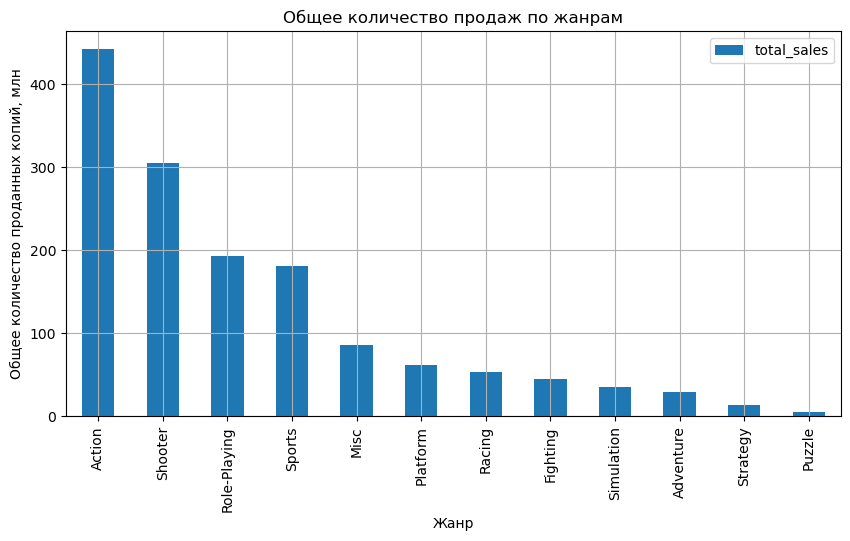

In [45]:
#построим график с жанрами
actual_period.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'total_sales').plot(kind='bar', figsize=(10,5), y='total_sales', grid=True)

plt.title('Общее количество продаж по жанрам')
plt.ylabel('Общее количество проданных копий, млн')
plt.xlabel('Жанр')
plt.show()

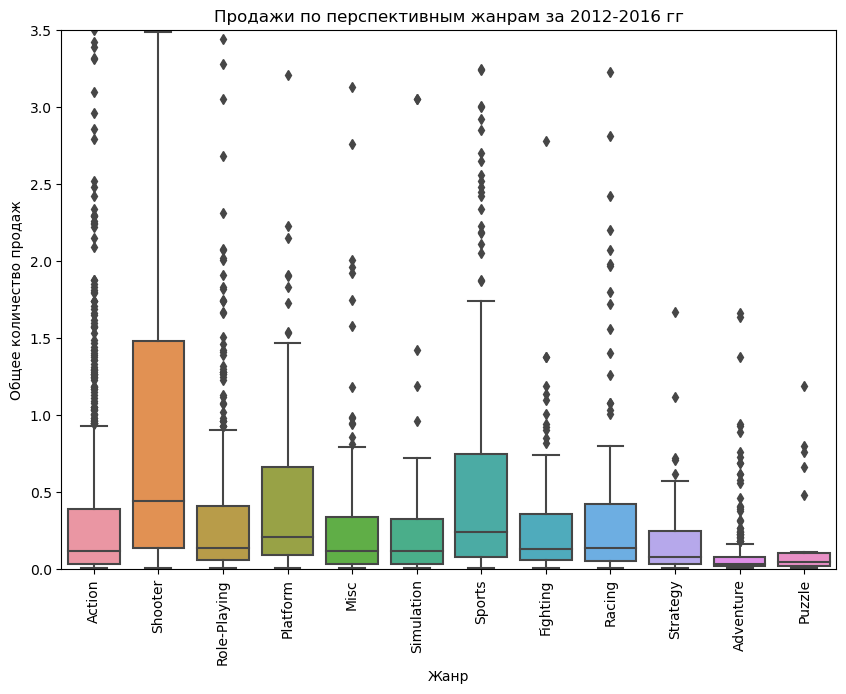

In [46]:
#построим диаграмму размаха для жанров
plt.figure(figsize=(10,7))
sns.boxplot(data = actual_period, x='genre', y='total_sales')
plt.ylim([0,3.5])
plt.title('Продажи по перспективным жанрам за 2012-2016 гг')
plt.xticks(rotation='vertical')
plt.ylabel('Общее количество продаж')
plt.xlabel('Жанр')
plt.show()

На первом графике видим, что наиболее продаваемые игры за актуальный период - игры жанра Action (примерно 441 млн. копий). Наименее популярны игры жанра - Puzzle (почти 5 млн. проданных копий).

Но построив диаграмму размаха, замечаем, что за актуальный период наиболее размашистое расположение боксплота и высокое медианное значение имеет жанр Shooter, затем - Sports и Platform. Интернет-магазину "Стримчик" необходимо заострить внимание именно на этих жанрах при выборе потенциально прибыльных игр в 2017 году.

## Портрет пользователя каждого региона

In [47]:
#создадим таблицы с популярными платформами по регионам
na_platforms = actual_period.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').reset_index()
eu_platforms = actual_period.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').reset_index()
jp_platforms = actual_period.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').reset_index()

In [48]:
#выведем таблицу с популярными платформами в Северной Америке
na_platforms

,platform,na_sales
0,x360,140.05
1,ps4,108.74
2,ps3,103.38
3,xone,93.12
4,3ds,55.31
5,wiiu,38.10
6,pc,19.12
7,wii,17.45
8,psv,10.98
9,ds,4.59


In [49]:
#выведем таблицу с популярными платформами в Европе
eu_platforms

,platform,eu_sales
0,ps4,141.09
1,ps3,106.85
2,x360,74.52
3,xone,51.59
4,3ds,42.64
5,pc,37.76
6,wiiu,25.13
7,wii,11.92
8,psv,11.36
9,ds,3.53


In [50]:
#выведем таблицу с популярными платформами в Японии
jp_platforms

,platform,jp_sales
0,3ds,87.79
1,ps3,35.29
2,psv,21.04
3,ps4,15.96
4,wiiu,13.01
5,psp,10.47
6,ds,3.72
7,wii,3.39
8,x360,1.57
9,xone,0.34


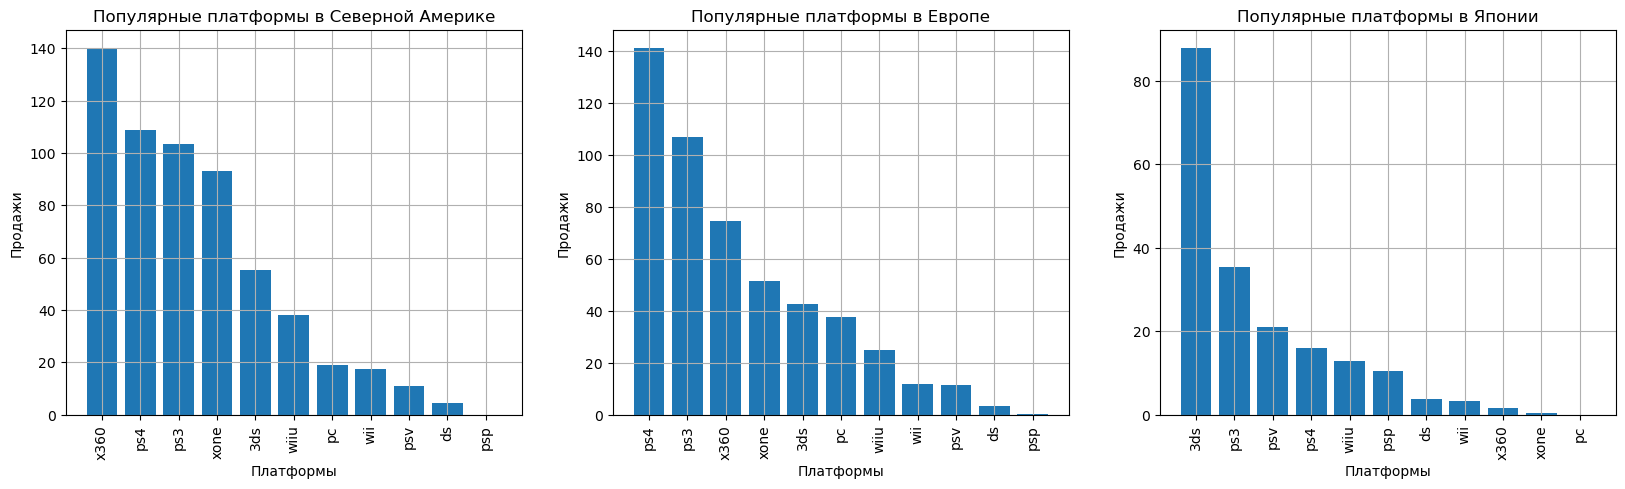

In [51]:
#построим графики с популярными платформами по регионам
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))

ax1.bar(na_platforms['platform'], na_platforms['na_sales'])
ax1.set_xticklabels(na_platforms['platform'], rotation=90)
ax1.set_title('Популярные платформы в Северной Америке')
ax1.set_xlabel('Платформы')
ax1.set_ylabel('Продажи')
ax1.grid(True)

ax2.bar(eu_platforms['platform'], eu_platforms['eu_sales'])
ax2.set_xticklabels(eu_platforms['platform'], rotation=90)
ax2.set_title('Популярные платформы в Европе')
ax2.set_xlabel('Платформы')
ax2.set_ylabel('Продажи')
ax2.grid(True)

ax3.bar(jp_platforms['platform'], jp_platforms['jp_sales'])
ax3.set_xticklabels(jp_platforms['platform'], rotation=90)
ax3.set_title('Популярные платформы в Японии')
ax3.set_xlabel('Платформы')
ax3.set_ylabel('Продажи')
ax3.grid(True)

plt.show()

Можем сделать вывод, что за акутальный период самая популярная игровая платформа в Северной Америке - X360, в Европе - PS4, в Японии - 3DS.

In [52]:
#создадим таблицы с популярными жанрами по регионам
na_genre = actual_period.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').reset_index()
eu_genre = actual_period.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').reset_index()
jp_genre = actual_period.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').reset_index()

In [53]:
#выведем таблицу с популярными жжанрами в Северной Америке
na_genre

,genre,na_sales
0,Action,177.84
1,Shooter,144.77
2,Sports,81.53
3,Role-Playing,64.00
4,Misc,38.19
5,Platform,25.38
6,Fighting,19.79
7,Racing,17.22
8,Adventure,8.92
9,Simulation,7.97


In [54]:
#выведем таблицу с популярными жжанрами в Европе
eu_genre

,genre,eu_sales
0,Action,159.34
1,Shooter,113.47
2,Sports,69.08
3,Role-Playing,48.53
4,Racing,27.29
5,Misc,26.32
6,Platform,21.41
7,Simulation,14.55
8,Fighting,10.79
9,Adventure,9.46


In [55]:
#выведем таблицу с популярными жжанрами в Японии
jp_genre

,genre,jp_sales
0,Role-Playing,65.44
1,Action,52.80
2,Misc,12.86
3,Simulation,10.41
4,Fighting,9.44
5,Shooter,9.23
6,Platform,8.63
7,Adventure,8.24
8,Sports,8.01
9,Strategy,2.88


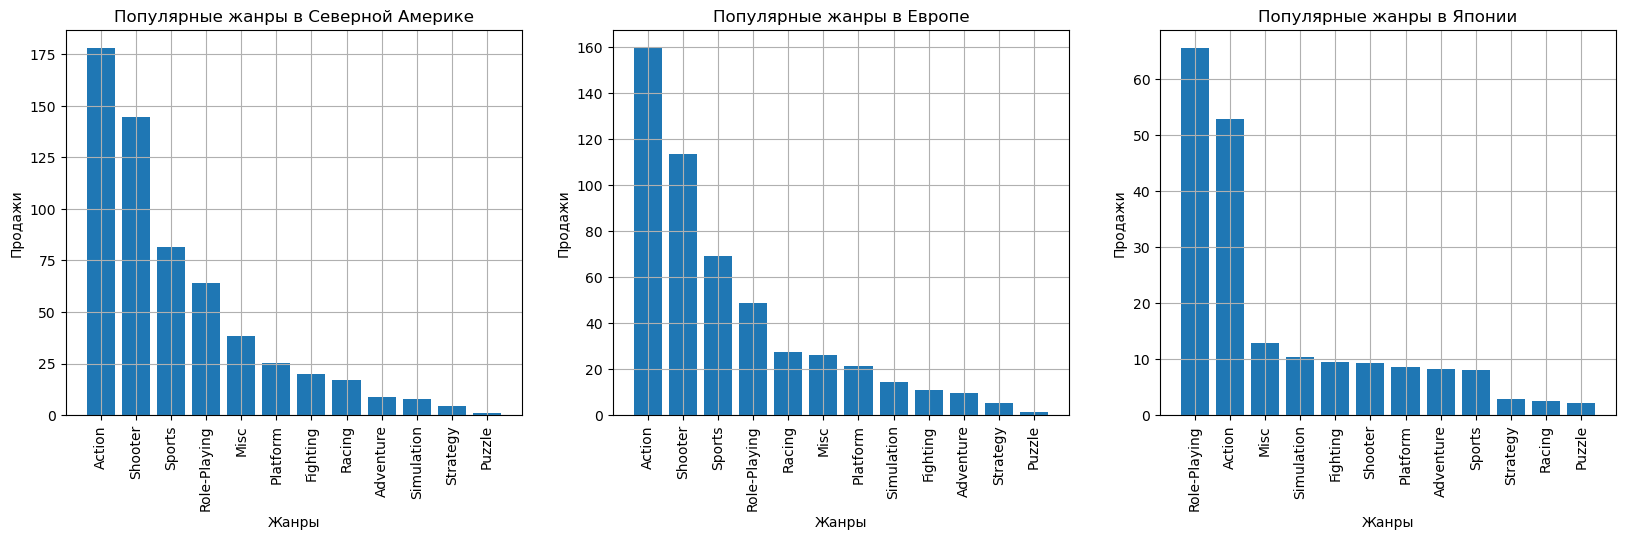

In [56]:
#построим графики с популярными жанрами по регионам
fig, (ax4, ax5, ax6) = plt.subplots(1, 3, figsize=(20,5))

ax4.bar(na_genre['genre'], na_genre['na_sales'])
ax4.set_xticklabels(na_genre['genre'], rotation=90)
ax4.set_title('Популярные жанры в Северной Америке')
ax4.set_xlabel('Жанры')
ax4.set_ylabel('Продажи')
ax4.grid(True)

ax5.bar(eu_genre['genre'], eu_genre['eu_sales'])
ax5.set_xticklabels(eu_genre['genre'], rotation=90)
ax5.set_title('Популярные жанры в Европе')
ax5.set_xlabel('Жанры')
ax5.set_ylabel('Продажи')
ax5.grid(True)

ax6.bar(jp_genre['genre'], jp_genre['jp_sales'])
ax6.set_xticklabels(jp_genre['genre'], rotation=90)
ax6.set_title('Популярные жанры в Японии')
ax6.set_xlabel('Жанры')
ax6.set_ylabel('Продажи')
ax6.grid(True)

plt.show()

На основании полученных данных, делаем вывод, что за актуальный период самый популярный жанр игр в Северной Америке и Европе - Action, в Японии - Role-Playing.

Расшифруем возрастные категории ESRB:
- EC (Early Childhood) - Игры для детей младшего возраста (до 6 лет).
- E (Everyone) - Игры для всех возрастных категорий.
- E10+ (Everyone 10 and older) - Игры для всех возрастных категорий старше 10 лет.
- T (Teen) - Игры для подростков.
- M (Mature) - Игры для взрослых.
- AO (Adults Only) - Игры только для взрослых.
- RP (Rating Pending) - Рейтинг ожидается.


In [57]:
#создадим таблицы с популярными рейтингами по регионам
na_rating = actual_period.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum').sort_values(by='na_sales',ascending=False).reset_index()
eu_rating = actual_period.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum').sort_values(by='eu_sales',ascending=False).reset_index()
jp_rating = actual_period.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum').sort_values(by='jp_sales',ascending=False).reset_index()

In [58]:
#выведем таблицу с популярными рейтингами в Северной Америке
na_rating

,rating,na_sales
0,M,231.57
1,E,114.37
2,undefined,103.31
3,E10+,75.70
4,T,66.02


In [59]:
#выведем таблицу с популярными рейтингами в Европе
eu_rating

,rating,eu_sales
0,M,193.96
1,E,113.02
2,undefined,91.50
3,E10+,55.37
4,T,52.96


In [60]:
#выведем таблицу с популярными рейтингами в Японии
jp_rating

,rating,jp_sales
0,undefined,108.84
1,E,28.33
2,T,26.02
3,M,21.20
4,E10+,8.19


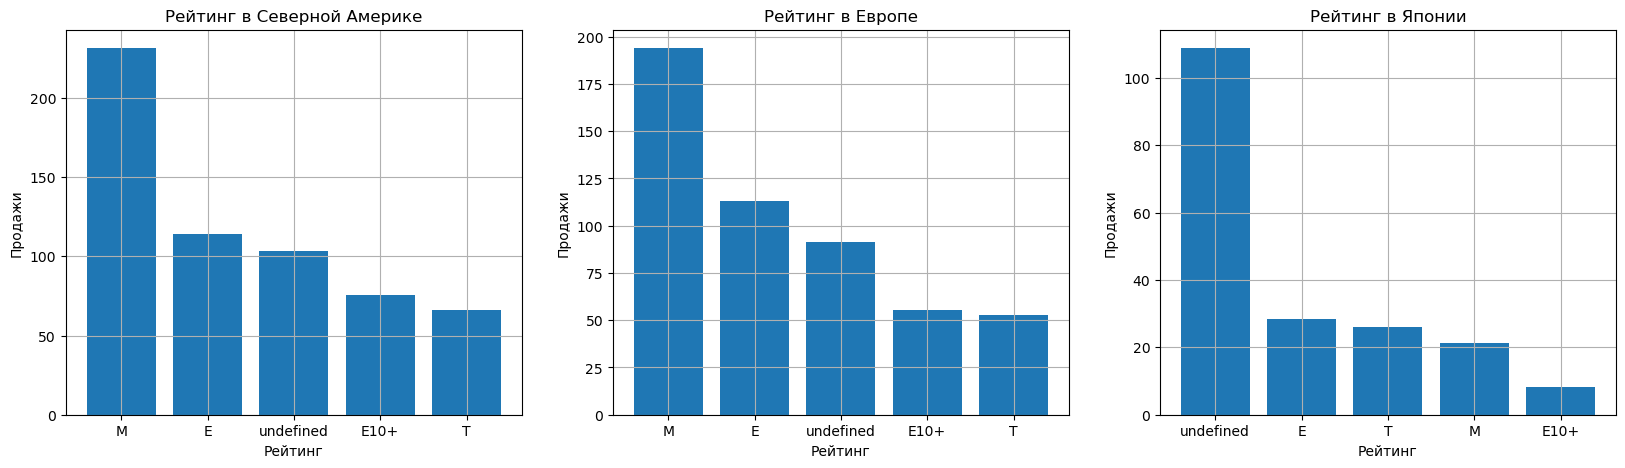

In [61]:
#построим графики с популярными рейтингами по регионам
fig, (ax7, ax8, ax9) = plt.subplots(1, 3, figsize=(20,5))

ax7.bar(na_rating['rating'], na_rating['na_sales'])
ax7.set_title('Рейтинг в Северной Америке')
ax7.set_xlabel('Рейтинг')
ax7.set_ylabel('Продажи')
ax7.grid(True)

ax8.bar(eu_rating['rating'], eu_rating['eu_sales'])
ax8.set_title('Рейтинг в Европе')
ax8.set_xlabel('Рейтинг')
ax8.set_ylabel('Продажи')
ax8.grid(True)

ax9.bar(jp_rating['rating'], jp_rating['jp_sales'])
ax9.set_title('Рейтинг в Японии')
ax9.set_xlabel('Рейтинг')
ax9.set_ylabel('Продажи')
ax9.grid(True)

plt.show()

По рейтингам видно, что за актуальный период больше всего продаж у игр с рейтингом "Игры для взрослых" - в Северной Америке и Европе, в Японии чаще всего продавались игры с еще не определенным рейтингом.

**Вывод по портретам пользователей для каждого региона:**

Согласно полученным данным:
- в Северной Америке:
  - Топ игровых платформ: X360, PS4, PS3
  - Топ жанров игр: Action, Shooter, Sports
  - Топ рейтингов игр: "Игры для взрослых" и "Игры для всех возрастных категорий"
  
- в Европе:
  - Топ игровых платформ: PS4, PS3, X360
  - Топ жанров игр: Action, Shooter, Sports
  - Топ рейтингов игр: "Игры для взрослых" и "Игры для всех возрастных категорий"

- в Японии:
  - Топ игровых платформ : 3DS, PS3, PSV
  - Топ жанров игр: Role-playing, Action, Misc
  - Топ рейтингов игр: Игры с неопределенным рейтингом и "Игры для всех возрастных категорий"


Соответственно, можем предположить, что для 2017 года большую часть прибыли будут приносить игры жанра Action и Shooter, для платформы PS4 и с рейтингом "Игры для взрослых".

## Проверим гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую гипотезу H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.

Сформулируем альтернативную гипотезу Н1: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [62]:
#пользовательский рейтинг платформы Xbox One
xbox_group = actual_period.query('platform == "xone"')['user_score']
#пользовательский рейтинг платформы PC                                                  
pc_group = actual_period.query('platform == "pc"')['user_score']

In [63]:
#посчитаем средний пользовательский рейтинг для платформы Xbox One
xbox_group.mean()

6.521428571428572

In [64]:
#посчитаем средний пользовательский рейтинг для платформы PC 
pc_group.mean()

6.428640776699029

In [65]:
# задаём уровень значимости
alpha = 0.05

# проводим ttest для двух выборок
results = st.ttest_ind(xbox_group.dropna(), pc_group.dropna(), equal_var=False)

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.5489537965134912
Нет оснований отвергнуть нулевую гипотезу


Полученное значение p-value оказалось больше заданного уровня значимости, поэтому нулевая гипотеза не отвергается. Кроме того, посчитанные средние пользовательские рейтинги для платформ Xbox One и PC оказались приближенными. Есть основания говорить, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Сформулируем нулевую гипотезу H0: Средние пользовательские рейтинги жанров Action и Sports равны.

Сформулируем альтернативную гипотезу Н1: Средние пользовательские рейтинги жанров Action и Sports различаются.

In [66]:
#пользовательский рейтинг жанра Action
action_group = actual_period.query('genre == "Action"')['user_score']
#пользовательский рейтинг жанра Sports                                    
sports_group = actual_period.query('genre == "Sports"')['user_score']

In [67]:
#посчитаем средний пользовательский рейтинг для жанра Action
action_group.mean()

6.825047801147227

In [68]:
#посчитаем средний пользовательский рейтинг для жанра Sports 
sports_group.mean()

5.455670103092784

In [69]:
# задаём уровень значимости
alpha = 0.05

# проводим ttest для двух выборок
results = st.ttest_ind(action_group.dropna(), sports_group.dropna(), equal_var=False)

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 5.989458066467418e-20
Отвергаем нулевую гипотезу


Полученное значение p-value оказалось меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Дополнительно посчитанные средние пользовательские рейтинги для жанров Action и Sports заметно отличаются. Есть основания говорить, что средние пользовательские рейтинги жанров Action и Sports различаются.

**Вывод по проверке гипотез:**

В обоих случаях для проверки гипотез использовался двухвыборочный t-тест, так как мы имели дело с двумя выборками и хотели проверить, есть ли статистически значимые различия между средними значениями. Поскольку в каждом случае у нас две независимые выборки, в нулевых гипотезах мы приравниваем средние значения, а в альтернативных противопоставляем средние значения.

В итоге:
- Нулевую гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковы" не удалось опровергнуть.
- Нулевую гипотезу "Средние пользовательские рейтинги жанров Action и Sports равны" отвергаем. 

## Общий вывод

Для получения корректных результатов исследования исходная таблица была успешно преобразована на этапе предобработки.

В ходе исследования был определен актуальный период - с 2012 по 2016 гг. Также было выявлено:

- в 2016 году наиболее популярная платформы - X360, PS4 и XOne;
- в среднем игргы для определенной платформы выпускаются в течение 7 лет;
- пик продаж для определенной платформы наступает на 5-6 год продаж;
- отзывы критиков больше влияют на продажи, нежели отзывы пользователей;
- наиболее популярные жанры игр - Shooter, Sports и Platform.

Вывод по портретам пользователей для каждого региона согласно полученным данным:
- в Северной Америке:
  - Топ игровых платформ: X360, PS4, PS3
  - Топ жанров игр: Action, Shooter, Sports
  - Топ рейтингов игр: "Игры для взрослых" и "Игры для всех возрастных категорий"
  
- в Европе:
  - Топ игровых платформ: PS4, PS3, X360
  - Топ жанров игр: Action, Shooter, Sports
  - Топ рейтингов игр: "Игры для взрослых" и "Игры для всех возрастных категорий"

- в Японии:
  - Топ игровых платформ : 3DS, PS3, PSV
  - Топ жанров игр: Role-playing, Action, Misc
  - Топ рейтингов игр: Игры с неопределенным рейтингом и "Игры для всех возрастных категорий"


Также были проверены предложенные гипотезы. Получив результаты проведенных тестов, предполагаем, что:
- средние пользовательские рейтинги платформ Xbox One и PC одинаковы;
- средние пользовательские рейтинги жанров Action и Sports различаются.

Рекомендации:
коллегам можем передать информацию, что в 2017 году при выборе потенциально прибыльных игр и планировании рекламных кампаний им необходимо оринетироваться на платформы: X360, PS4 и XOne; на жанры: Shooter, Sports и Platform; на оценки критиков.